# 1.
Изучите данные из файлов с заказами и посетителями.
Столбцы таблицы с заказами (orders):
orderId — идентификатор заказа;
userId — идентификатор пользователя, совершившего заказ;
group — группа A/B-теста;
revenue — выручка заказа;
date — дата заказа.
Столбцы таблицы с посетителями (visitors):
date — дата;
group — группа A/B-теста;
visitors — количество посетителей интернет-магазина в указанной группе A/B-теста в указанную дату.
Не удаляйте вывод первых пяти строк датафреймов и выполните задание по шагам:
1) Создайте датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. Избавьтесь от дубликатов методом drop_duplicates().
2) Объявите переменную ordersAggregated, содержащую:
дату;
группу A/B-теста;
число уникальных заказов в группе теста по указанную дату включительно;
число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
суммарную выручку заказов в группе теста по указанную дату включительно.
3) Объявите переменную visitorsAggregated, содержащую:
дату;
группу A/B-теста;
количество уникальных посетителей в группе теста по указанную дату включительно.
4) ordersAggregated и visitorsAggregated отсортируйте по столбцам 'date', 'group' в указанном порядке.
5) Определите переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge()
6) Присвойте столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
7) Выведите первые 5 строк переменной cumulativeData

Подсказка
Получите таблицу ordersAggregated так:
datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'orderId' : pd.Series.nunique,
'userId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
Объедините таблицы методом merge():
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [21]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

orders = pd.read_csv('datasets/data_for_tasks_3.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%d/%m/%Y')
)

visitors = pd.read_csv('datasets/data_for_tasks_3_visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%d/%m/%Y')
)

print(orders.head(5))
print(visitors.head(5))

# Создайте датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. Избавьтесь от дубликатов методом drop_duplicates()
datesGroups = orders[['date', 'group']].drop_duplicates()

# Объявите переменную ordersAggregated, содержащую:
# дату;
# группу A/B-теста;
# число уникальных заказов в группе теста по указанную дату включительно;
# число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
# суммарную выручку заказов в группе теста по указанную дату включительно.
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                     orders['group'] == x['group'])]\
                                     .agg({'date':np.max,
                                           'group':np.max,
                                           'orderId':'nunique',
                                           'userId':'nunique',
                                           'revenue':np.sum}), axis='columns')\
                              .sort_values(by=list(datesGroups.columns))

# Объявите переменную visitorsAggregated, содержащую:
# дату;
# группу A/B-теста;
# количество уникальных посетителей в группе теста по указанную дату включительно
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                         visitors['group'] == x['group'])]
                                       .agg({'date': np.max,
                                             'group':np.max,
                                             'visitors':np.sum}), axis='columns')\
                                       .sort_values(by=list(datesGroups.columns))

# Определите переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge()
cumulativeData = ordersAggregated.merge(right=visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

# Присвойте столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head())

         userId group       orderId  revenue       date
0  1.815263e+19     B  4.612878e+15      489 2019-04-22
1  1.815263e+19     B  4.612878e+15      489 2019-04-22
2  1.794078e+19     B  4.136278e+18       97 2019-04-22
3  1.794078e+19     B  4.136278e+18      279 2019-04-22
4  2.461477e+18     B  1.406554e+19     4092 2019-04-22
        date group  visitors
0 2019-03-11     A       321
1 2019-03-12     A       831
2 2019-03-13     A       700
3 2019-03-14     A      1222
4 2019-03-15     A       859
        date group  orders  buyers  revenue  visitors
0 2019-03-11     A      10      10   110291       321
1 2019-03-11     B       9       9    36646       337
2 2019-03-12     A      35      33   343089      1152
3 2019-03-12     B      35      33    90491      1198
4 2019-03-13     A      59      56  1012663      1852


# 2.
Объявите переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраните данные о датах, выручке и числе заказов в группах A и B.
Постройте графики кумулятивной выручки по дням по группам.

Подсказка
Рассчитайте переменные, как это было сделано в уроке. Постройте графики методом plt.plot() с параметрами label='A' и label='B' соответственно. Выведите легенду на графике методом plt.legend().

In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue'],
         label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue'],
         label='B')
plt.legend()
plt.show()

# 3.
Для каждой группы постройте графики кумулятивного среднего чека по дням.

Подсказка
Вычислите средний чек так: cumulativeRevenueA['revenue']/cumulativeRevenueA['orders']. Постройте графики методом plt.plot() с параметрами label='A' и label='B' соответственно. Выведите легенду на графике методом plt.legend().

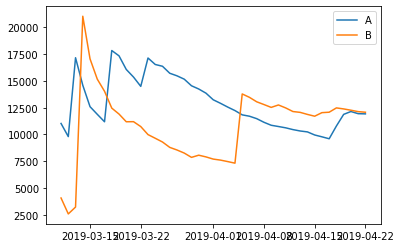

In [35]:
plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],
         label='A')

plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],
         label='B')
plt.legend()
plt.show()

# 4.
Объедините таблицы cumulativeRevenueA и cumulativeRevenueB методом merge() так, чтобы она содержала столбцы: ['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB']. Сохраните в переменной mergedCumulativeRevenue.
Постройте график относительно различия кумулятивного среднего чека группы B к группе A.
Добавьте пунктирную линию оси X (значение оси Y = 0) методом plt.axhline().

Подсказка
Объедините таблицы так:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
Постройте график относительного различия методом plt.plot(). Методу plt.axhline() передайте параметры: (y=0, color='black', linestyle='--').

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


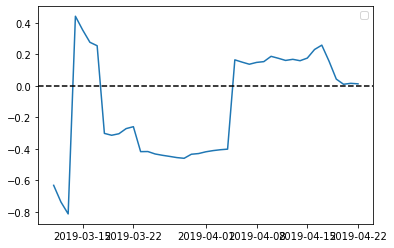

In [41]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(right=cumulativeRevenueB,
                                                   how='left',
                                                   left_on='date',
                                                   right_on='date',
                                                   suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'],
         ((mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1))
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.show()

# 5.
Добавьте в cumulativeData столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.
Объявите переменные cumulativeDataA и cumulativeDataB, в которых сохраните данные о заказах в сегментах A и B соответственно.
Постройте графики кумулятивной конверсии по дням по группам.
Задайте масштаб осей так: plt.axis([dt.datetime(2019, 3, 10), dt.datetime(2019, 4, 23), 0, 0.05]).

Подсказка
Постройте графики методом plt.plot() с параметрами label='A' и label='B' соответственно. Выведите легенду на графике методом plt.legend().

(17965.0, 18009.0, 0.0, 0.05)

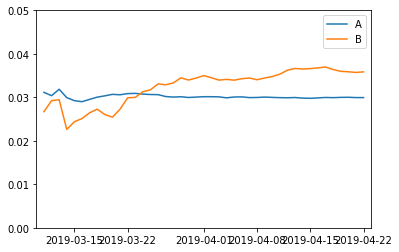

In [43]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.plot(cumulativeDataA['date'],
         cumulativeDataA['conversion'],
         label='A')

plt.plot(cumulativeDataB['date'],
         cumulativeDataB['conversion'],
         label='B')
plt.legend()

plt.axis([dt.datetime(2019, 3, 10), dt.datetime(2019, 4, 23), 0, 0.05])

# 6.
Объедините таблицы cumulativeDataA и cumulativeDataB методом merge() так, чтобы она содержала столбцы: ['date', 'conversionA', 'conversionB']. Сохраните в переменной mergedCumulativeConversions.
Постройте график относительного различия кумулятивной конверсии группы B к группе A.
Добавьте пунктирную линию оси X чёрного цвета ('black') со значением оси Y = 0 методом plt.axhline(). И ещё одну линию оси X серого цвета ('grey') со значением оси Y = 0.2.
Задайте масштаб осей так: plt.axis(["2019-03-10", '2019-04-23', -0.5, 0.5]).

Подсказка
Объедините таблицы с конверсиями так:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
Постройте график относительного различия методом plt.plot(). Первому методу plt.axhline() передайте параметры: (y=0, color='black', linestyle='--'). Второму — параметры (y=0.2, color='grey', linestyle='--').

ConversionError: Failed to convert value(s) to axis units: '2019-03-10'

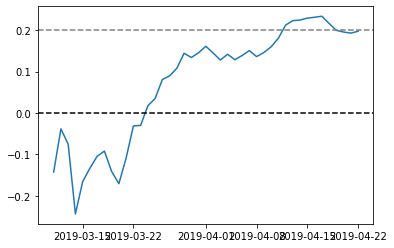

In [48]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date', 'conversion']],
                                                    left_on='date',
                                                    right_on='date',
                                                    how='left',
                                                    suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'],
         (mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1),
         label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(['2019-03-10', '2019-04-23', -0.5, 0.5])

In [34]:
print(cumulativeRevenueA)
print(cumulativeRevenueB)

         date   revenue  orders
0  2019-03-11    110291      10
2  2019-03-12    343089      35
4  2019-03-13   1012663      59
6  2019-03-14   1342703      92
8  2019-03-15   1448445     115
10 2019-03-16   1580480     133
12 2019-03-17   1678182     150
14 2019-03-18   3121617     175
16 2019-03-19   3398643     196
18 2019-03-20   3535463     220
20 2019-03-21   3563516     232
22 2019-03-22   3651968     252
24 2019-03-23   4696119     274
26 2019-03-24   4761952     288
28 2019-03-25   5041119     308
30 2019-03-26   5186304     330
32 2019-03-27   5493773     355
34 2019-03-28   5670877     374
36 2019-03-29   5760813     396
38 2019-03-30   5868971     412
40 2019-03-31   5944260     429
42 2019-04-01   6037307     456
44 2019-04-02   6119594     474
46 2019-04-03   6266654     499
48 2019-04-04   6409252     524
50 2019-04-05   6484086     548
52 2019-04-06   6531276     558
54 2019-04-07   6611036     576
56 2019-04-08   6727823     604
58 2019-04-09   6787849     625
60 2019-